In [35]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.facecolor']='yellow'

In [3]:
data = pd.read_csv('world_hapiness_score.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [38]:
data_columns=['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity','Trust (Government Corruption)']


In [39]:
data = data[data_columns].copy()


In [43]:
happy_df= data.rename({'Country':'country_name','Region':'region','Happiness Score':'happiness_score','Economy (GDP per Capita)':'Economy_GDP_per_capita','Family':'family','Health (Life Expectancy)':'Health_life_expectancy','Freedom':'freedom','Generosity':'generosity','Trust (Goverment Corruption)':'goverment_corruption'},axis=1)


In [44]:
happy_df.head()

,country_name,region,happiness_score,Economy_GDP_per_capita,family,Health_life_expectancy,freedom,generosity,Trust (Government Corruption)
0,135,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,58,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,37,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,105,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,24,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [45]:
happy_df=happy_df.rename(columns={'Trust (Government Corruption)':'trust_goverment'})
happy_df.head()

,country_name,region,happiness_score,Economy_GDP_per_capita,family,Health_life_expectancy,freedom,generosity,trust_goverment
0,135,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,58,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,37,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,105,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,24,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [46]:
happy_df.isnull().sum()

country_name              0
region                    0
happiness_score           0
Economy_GDP_per_capita    0
family                    0
Health_life_expectancy    0
freedom                   0
generosity                0
trust_goverment           0
dtype: int64

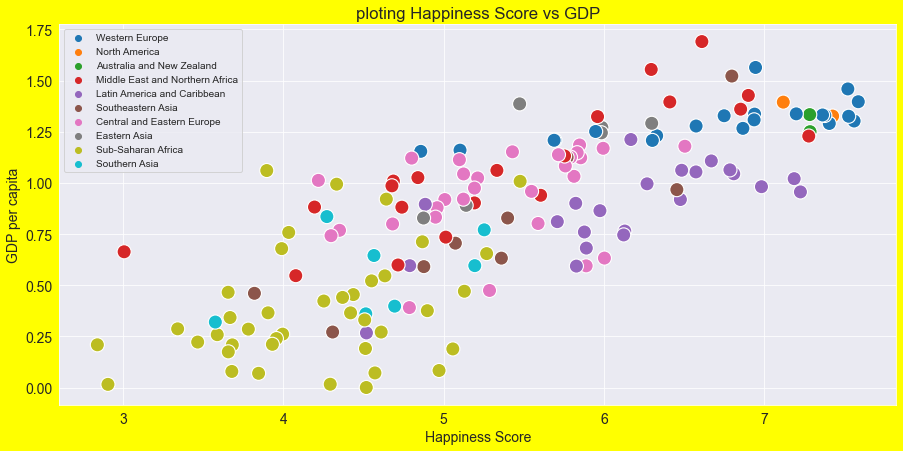

In [47]:
#Scatterplot for GDP per Capita and Happiness Score.
plt.rcParams['figure.figsize']=(15,7)
plt.title('ploting Happiness Score vs GDP')
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.Economy_GDP_per_capita, hue = happy_df.region,s=200);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')
plt.show()


In [48]:
gdp_region=happy_df.groupby('region')['Economy_GDP_per_capita'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy_GDP_per_capita, dtype: float64

<AxesSubplot:>

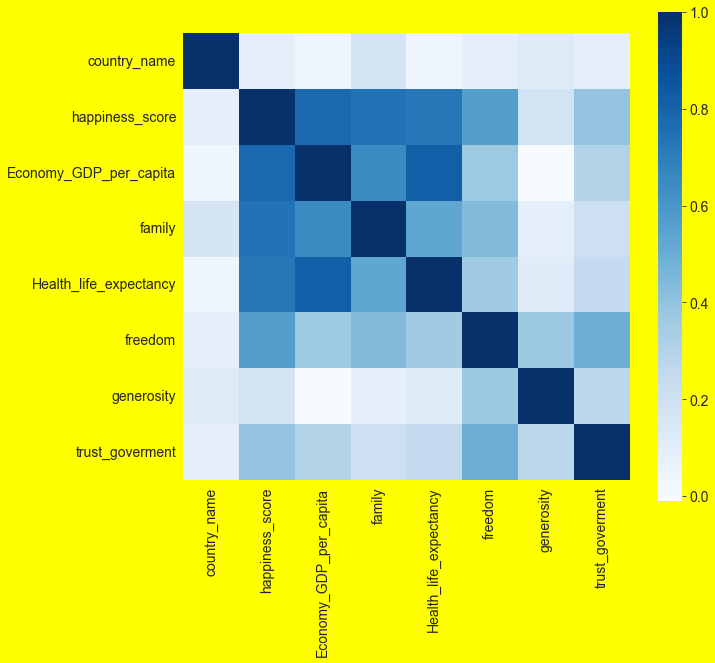

In [49]:
correlation=happy_df.corr(method='pearson')
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(correlation,mask=np.zeros_like(correlation,dtype=np.bool),cmap="Blues",square=True,ax=ax)

In [50]:
corruption=happy_df.groupby('region')[['trust_goverment']].mean()
corruption

,trust_goverment
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

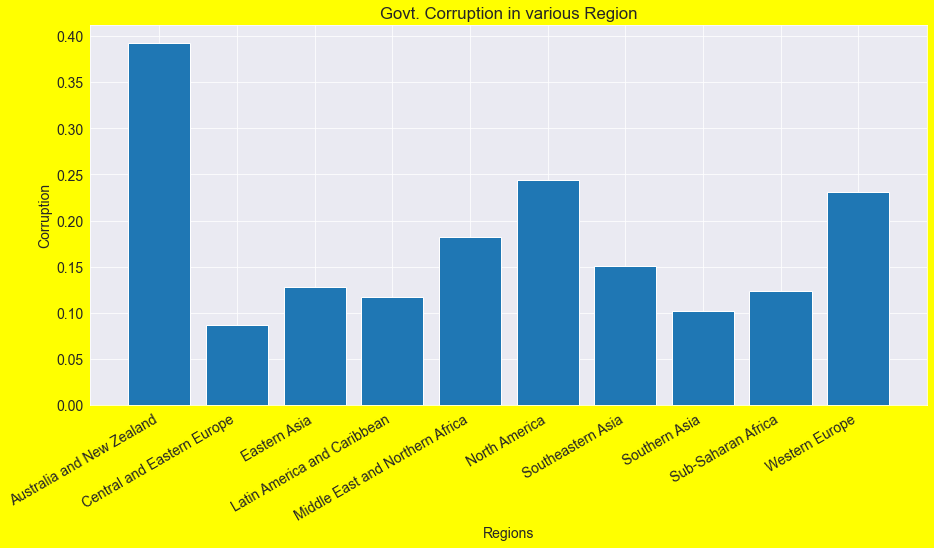

In [51]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Govt. Corruption in various Region')
plt.xlabel('Regions',fontsize=14)
plt.ylabel('Corruption',fontsize=14)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index, corruption.trust_goverment)    

In [52]:
top_10=happy_df.head(10)
bottom_10=happy_df.head(10)

Text(113.625, 0.5, 'Life expectancy')

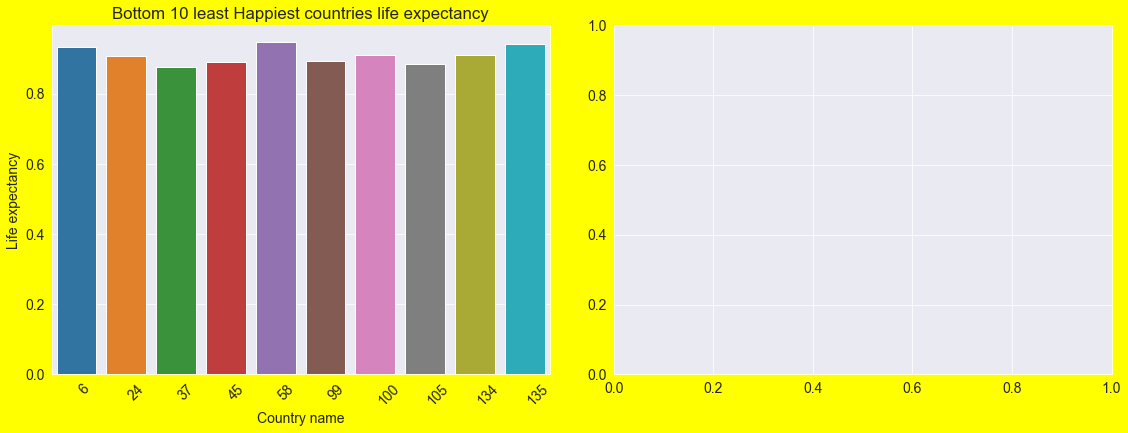

In [53]:
fig, axes=plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country_name
axes[0].set_title('Top 10 Happiest countries life expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= top_10.country_name,y= top_10.Health_life_expectancy, ax=axes[0])
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('Life expectancy')

xlabels=bottom_10.country_name
axes[0].set_title('Bottom 10 least Happiest countries life expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='left')
sns.barplot(x= bottom_10.country_name,y= bottom_10.Health_life_expectancy,ax=axes[0])
axes[0].set_xlabel('Country name')
axes[0].set_ylabel('Life expectancy')

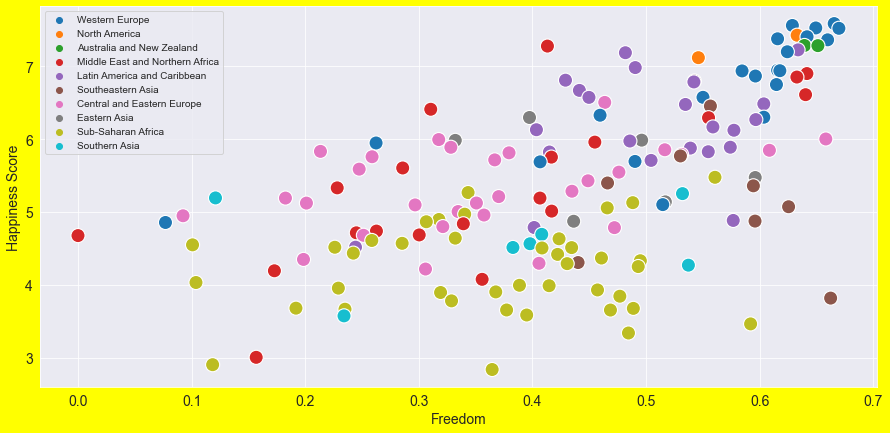

In [54]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.freedom, y=happy_df.happiness_score, hue=happy_df.region, s=200);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

<BarContainer object of 10 artists>

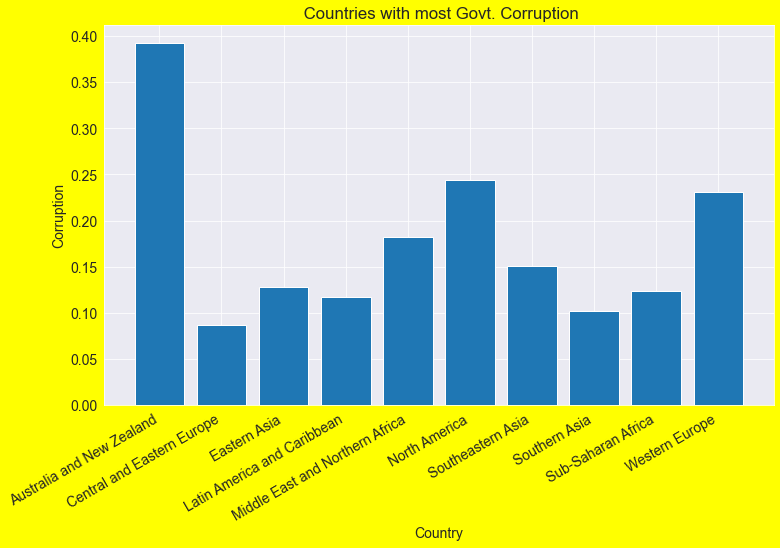

In [55]:
country=happy_df.sort_values(by='trust_goverment').head(10)
plt.rcParams['figure.figsize']=(12,7)
plt.title(' Countries with most Govt. Corruption')
plt.xlabel('Country',fontsize=14)
plt.ylabel('Corruption',fontsize=14)
plt.xticks(rotation=30,ha='right')
plt.bar(corruption.index, corruption.trust_goverment)    

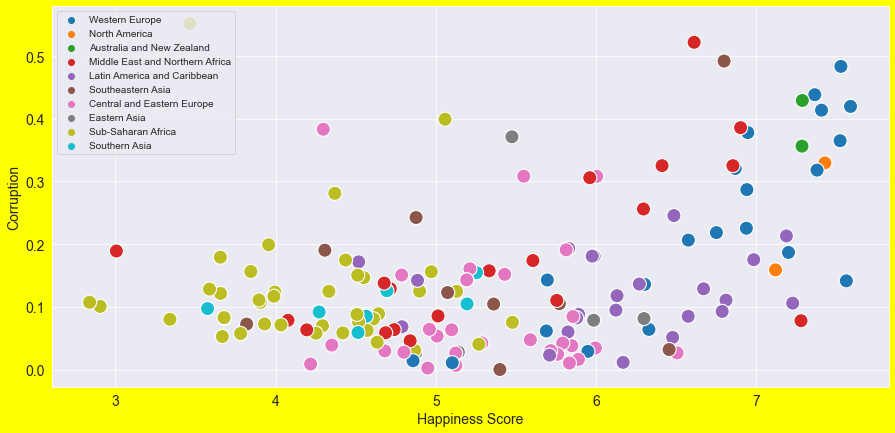

In [56]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.trust_goverment, hue=happy_df.region, s=200);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')
plt.show()

In [57]:
happy_df.skew()

country_name              0.000000
happiness_score           0.097769
Economy_GDP_per_capita   -0.317575
family                   -1.006893
Health_life_expectancy   -0.705328
freedom                  -0.413462
generosity                1.001961
trust_goverment           1.385463
dtype: float64

In [58]:
happy_df.describe()

,country_name,happiness_score,Economy_GDP_per_capita,family,Health_life_expectancy,freedom,generosity,trust_goverment
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.375734,0.846137,0.991046,0.630259,0.428615,0.237296,0.143422
std,45.754781,1.145010,0.403121,0.272369,0.247078,0.150693,0.126685,0.120034
min,0.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.150553,0.061675
50%,78.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.216130,0.107220
75%,117.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.309883,0.180255
max,157.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.795880,0.551910


<AxesSubplot:>

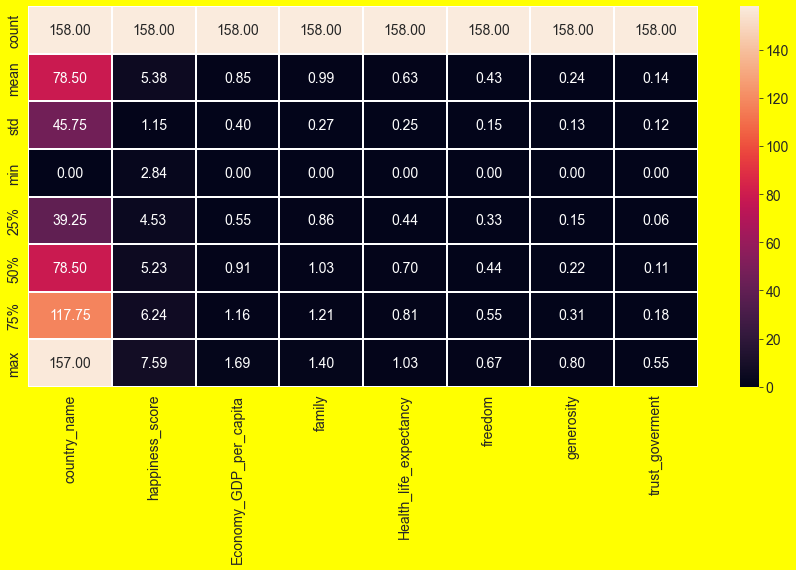

In [59]:
plt.figure(figsize=(15,7))
sns.heatmap(happy_df.describe(), annot=True,linewidth=0.2, linecolor='white',fmt='0.2f')

In [60]:
happy_df.corr()

,country_name,happiness_score,Economy_GDP_per_capita,family,Health_life_expectancy,freedom,generosity,trust_goverment
country_name,1.000000,0.083380,0.037808,0.159416,0.037829,0.085684,0.118085,0.088155
happiness_score,0.083380,1.000000,0.780966,0.740605,0.724200,0.568211,0.180319,0.395199
Economy_GDP_per_capita,0.037808,0.780966,1.000000,0.645299,0.816478,0.370300,-0.010465,0.307885
family,0.159416,0.740605,0.645299,1.000000,0.531104,0.441518,0.087513,0.205605
Health_life_expectancy,0.037829,0.724200,0.816478,0.531104,1.000000,0.360477,0.108335,0.248335
freedom,0.085684,0.568211,0.370300,0.441518,0.360477,1.000000,0.373916,0.493524
generosity,0.118085,0.180319,-0.010465,0.087513,0.108335,0.373916,1.000000,0.276123
trust_goverment,0.088155,0.395199,0.307885,0.205605,0.248335,0.493524,0.276123,1.000000


<AxesSubplot:>

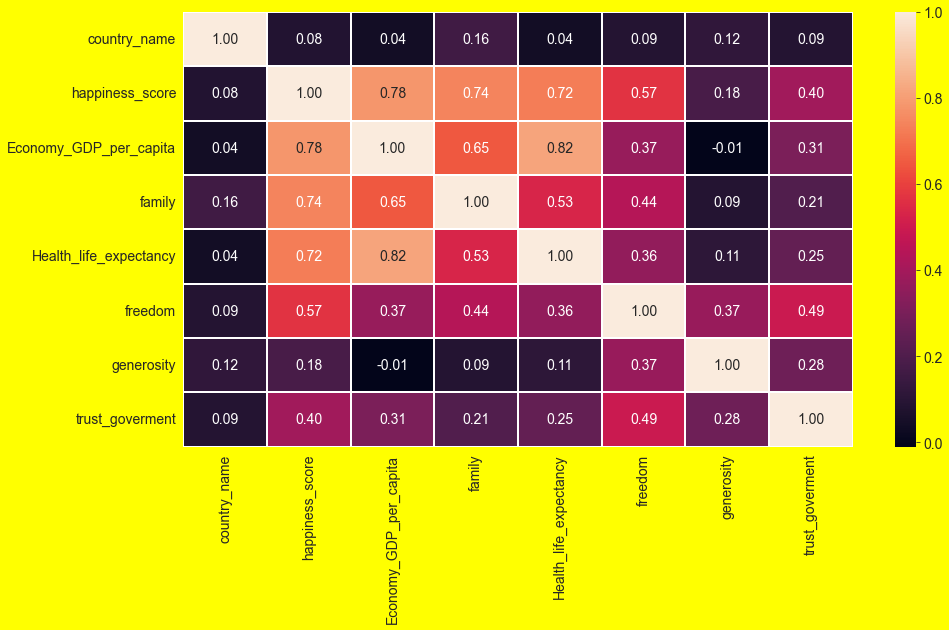

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(happy_df.corr(), annot=True, linewidth=0.1,linecolor='white',fmt='0.2f')

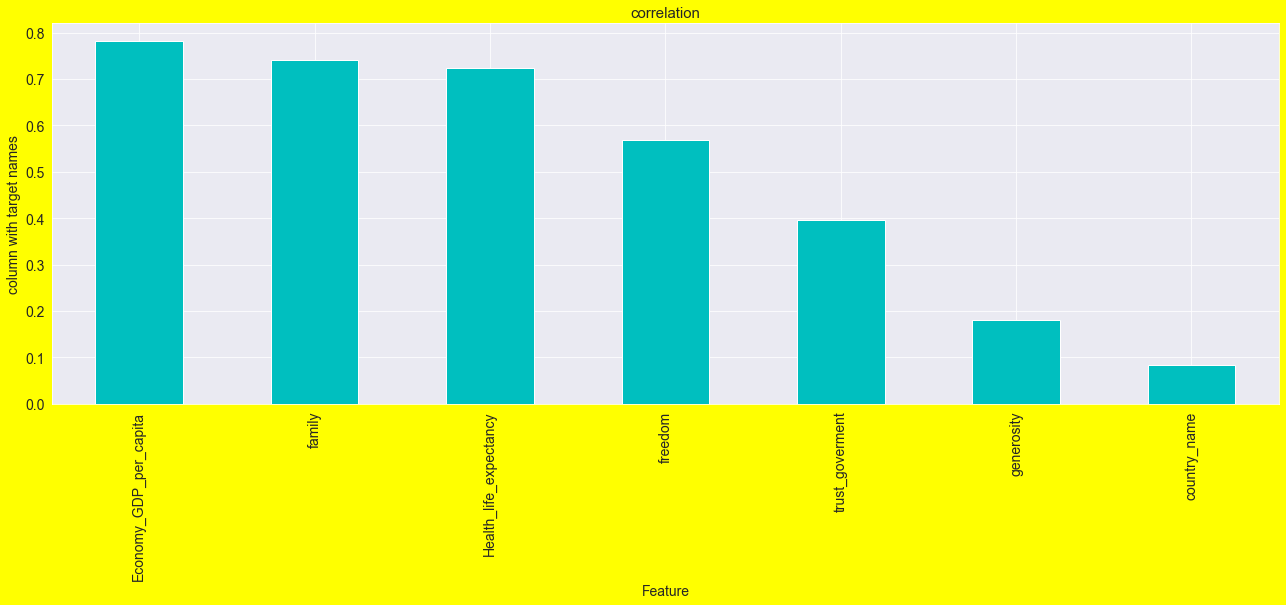

In [62]:
plt.figure(figsize=(22,7))
happy_df.corr()['happiness_score'].sort_values(ascending=False).drop(['happiness_score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation',fontsize=15)
plt.show()

In [63]:
import warnings
warnings.filterwarnings('ignore')
happy_df.skew()

country_name              0.000000
happiness_score           0.097769
Economy_GDP_per_capita   -0.317575
family                   -1.006893
Health_life_expectancy   -0.705328
freedom                  -0.413462
generosity                1.001961
trust_goverment           1.385463
dtype: float64

In [64]:
happy_df.dtypes

country_name                int32
region                     object
happiness_score           float64
Economy_GDP_per_capita    float64
family                    float64
Health_life_expectancy    float64
freedom                   float64
generosity                float64
trust_goverment           float64
dtype: object

In [65]:

happy_df.columns

Index(['country_name', 'region', 'happiness_score', 'Economy_GDP_per_capita',
       'family', 'Health_life_expectancy', 'freedom', 'generosity',
       'trust_goverment'],
      dtype='object')

In [66]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [67]:
for i in happy_df.columns:
    if happy_df[i].dtypes=="object":
        happy_df[i]=enc.fit_transform(happy_df[i].values.reshape(-1,1))
happy_df    

,country_name,region,happiness_score,Economy_GDP_per_capita,family,Health_life_expectancy,freedom,generosity,trust_goverment
0,135,9.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,58,9.0,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,37,9.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,105,9.0,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,24,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
153,118,8.0,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191
154,13,8.0,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,136,4.0,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906
156,21,8.0,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062


In [68]:
# outlier detection using boxplot

<AxesSubplot:>

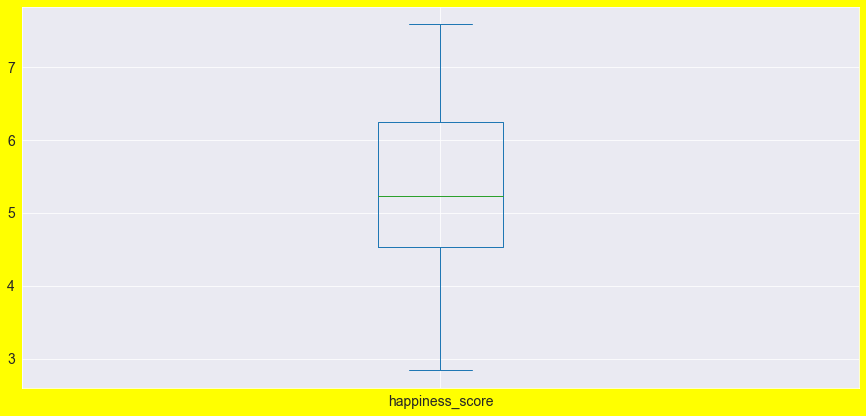

In [69]:
happy_df['happiness_score'].plot.box()

<AxesSubplot:>

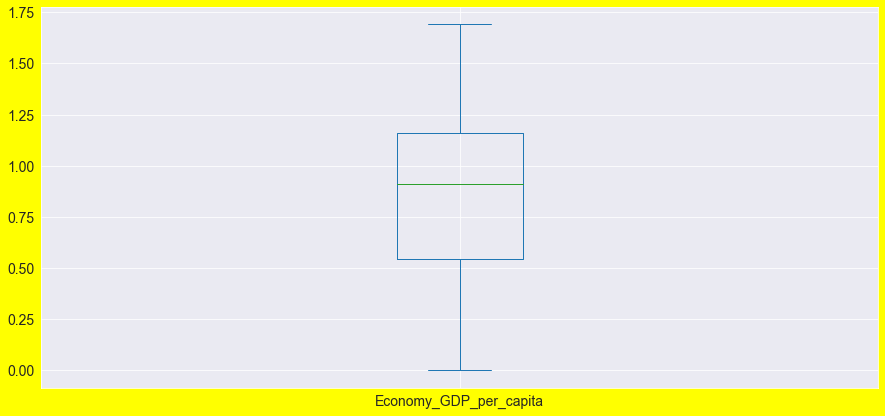

In [70]:
happy_df['Economy_GDP_per_capita'].plot.box()

<AxesSubplot:>

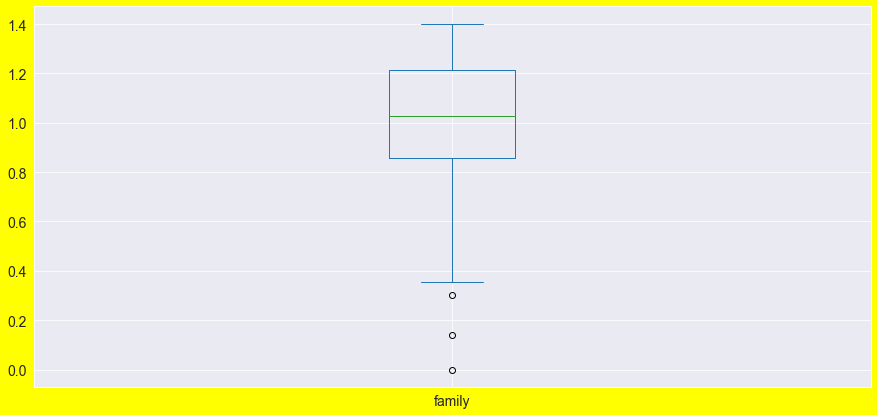

In [71]:
happy_df['family'].plot.box()

<AxesSubplot:>

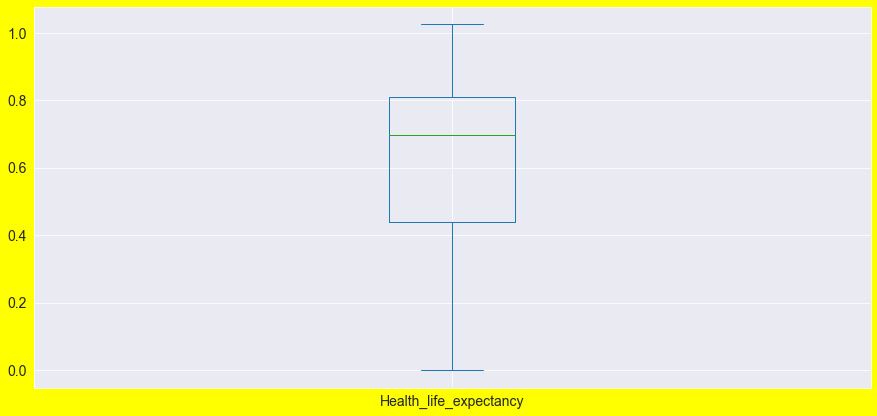

In [72]:
happy_df['Health_life_expectancy'].plot.box()

<AxesSubplot:>

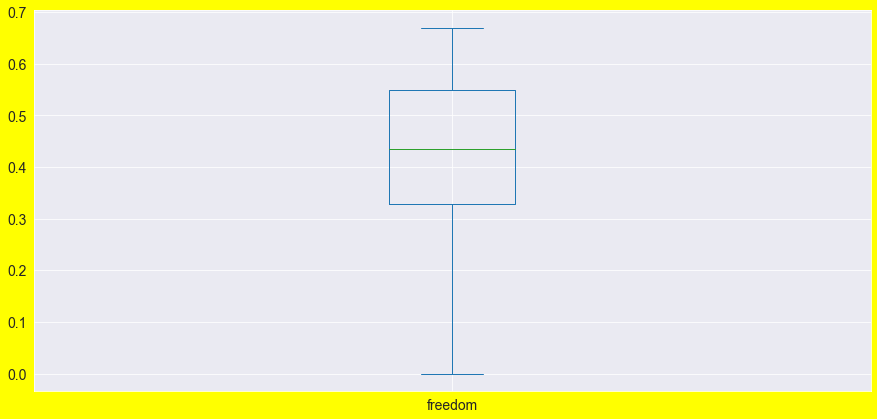

In [73]:
happy_df['freedom'].plot.box()

<AxesSubplot:>

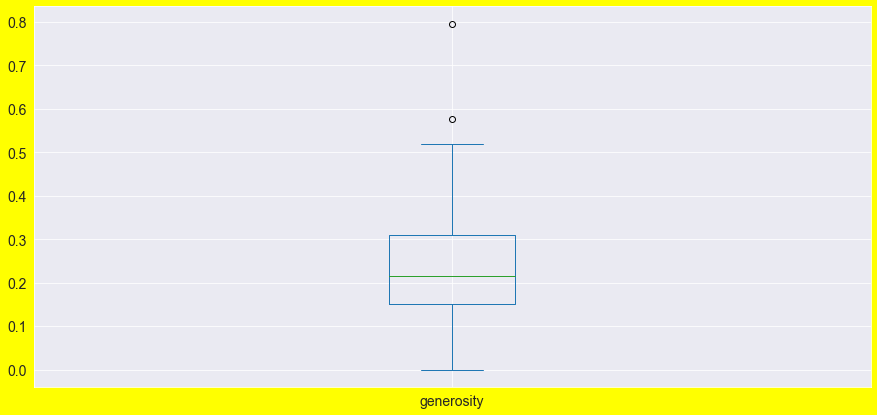

In [74]:

happy_df['generosity'].plot.box()

<AxesSubplot:>

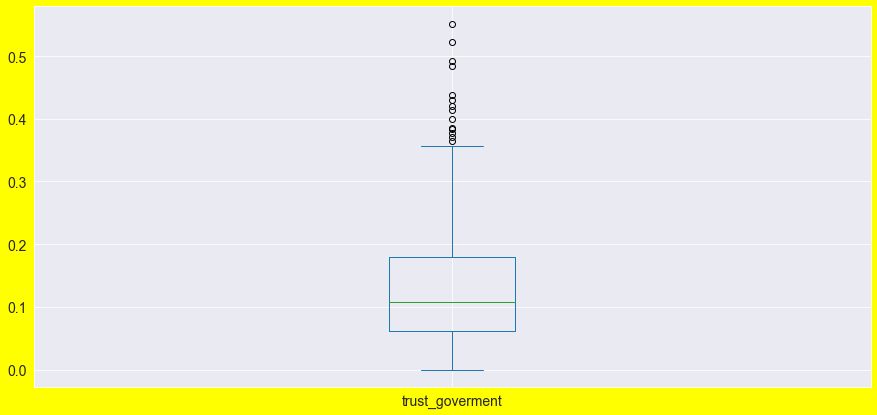

In [75]:
happy_df['trust_goverment'].plot.box()

In [76]:

happy_df.shape

(158, 9)

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(happy_df))
threshold=3
np.where(z>3)

(array([ 27, 128, 147, 153, 157], dtype=int64),
 array([8, 7, 4, 8, 4], dtype=int64))

In [78]:
happy_df_new_z=happy_df[(z<3).all(axis=1)]
happy_df_new_z

,country_name,region,happiness_score,Economy_GDP_per_capita,family,Health_life_expectancy,freedom,generosity,trust_goverment
0,135,9.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,58,9.0,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,37,9.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,105,9.0,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,24,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
...,...,...,...,...,...,...,...,...,...
151,20,8.0,3.587,0.25812,0.85188,0.27125,0.39493,0.21747,0.12832
152,0,7.0,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719
154,13,8.0,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010
155,136,4.0,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906


In [79]:
happy_df_new_z.shape

(153, 9)

In [80]:
Data_loss=((158-153)/158)*100
Data_loss


3.1645569620253164

In [81]:
features=happy_df.drop(["country_name","region","happiness_score"], axis=1)
target = happy_df["happiness_score"]

In [82]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [83]:
for i in range(0,100):
    features_train,features_test,target_train,target_test= train_test_split(features,target,test_size=0.2, random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training accuracy is:{r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the training accuracy is:{r2_score(target_test,pred_test)}")
    print('\n')

At random state 0, the training accuracy is:0.7934954655229758
At random state 0, the training accuracy is:0.674959293275678


At random state 1, the training accuracy is:0.7599584958477716
At random state 1, the training accuracy is:0.8497886631884372


At random state 2, the training accuracy is:0.7788420871167523
At random state 2, the training accuracy is:0.7571057958032006


At random state 3, the training accuracy is:0.7709602714133004
At random state 3, the training accuracy is:0.7877156496246466


At random state 4, the training accuracy is:0.76531460388099
At random state 4, the training accuracy is:0.7515820458867789


At random state 5, the training accuracy is:0.7816671100709469
At random state 5, the training accuracy is:0.7323616662575567


At random state 6, the training accuracy is:0.771522036920975
At random state 6, the training accuracy is:0.7919207631013563


At random state 7, the training accuracy is:0.7868537788780873
At random state 7, the training accuracy is:0

In [84]:
happy_df.mean()

country_name              78.500000
region                     5.120253
happiness_score            5.375734
Economy_GDP_per_capita     0.846137
family                     0.991046
Health_life_expectancy     0.630259
freedom                    0.428615
generosity                 0.237296
trust_goverment            0.143422
dtype: float64

In [85]:
features_train,features_test,target_train,target_test= train_test_split(features,target,test_size=0.2, random_state=72)

In [86]:
lr.fit(features_train,target_train)

LinearRegression()

In [87]:
pred_test=lr.predict(features_test)

In [88]:
print(r2_score(target_test,pred_test))

0.8906689060705234
